<a href="https://colab.research.google.com/github/Divit100/MNIST_Digit_Classifier/blob/master/_mnist_________.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


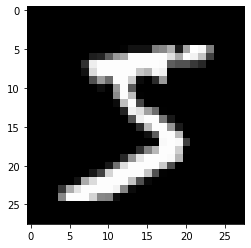

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [ ]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train=X_train.reshape(60000,28,28,1)

In [ ]:
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())


model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='accuracy',mode='max',patience=1)

In [ ]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),verbose=2,callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 35s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0523 - val_accuracy: 0.9842
Epoch 2/10
60000/60000 - 38s - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0716 - val_accuracy: 0.9793
Epoch 3/10
60000/60000 - 38s - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0718 - val_accuracy: 0.9827
Epoch 4/10
60000/60000 - 37s - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0776 - val_accuracy: 0.9828
Epoch 5/10
60000/60000 - 38s - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0793 - val_accuracy: 0.9829
Epoch 6/10
60000/60000 - 38s - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0859 - val_accuracy: 0.9816
Epoch 7/10
60000/60000 - 36s - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0958 - val_accuracy: 0.9813
Epoch 8/10
60000/60000 - 38s - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.1013 - val_accuracy: 0.9831
Epoch 9/10
60000/60000 - 37s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1040 - val_accuracy: 0.9830
Epoch

In [ ]:
metrics=pd.DataFrame(model.history.history)

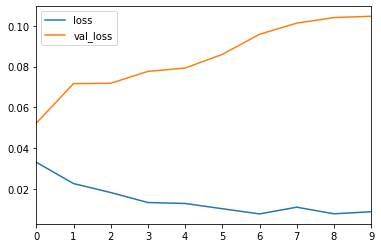

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.033034,0.989450,0.052257,0.9842
1,0.022571,0.992967,0.071591,0.9793
2,0.018178,0.993883,0.071782,0.9827
3,0.013267,0.995767,0.077604,0.9828
4,0.012809,0.995800,0.079268,0.9829
5,0.010225,0.996617,0.085941,0.9816
6,0.007685,0.997717,0.095796,0.9813
7,0.010984,0.996467,0.101289,0.9831
8,0.007741,0.997617,0.104010,0.9830
9,0.008755,0.997333,0.104664,0.9832


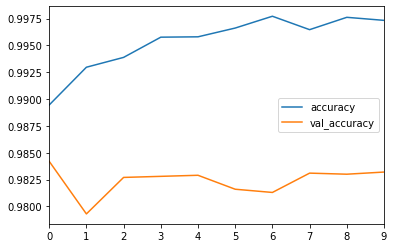

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 970,    2,    1,    0,    1,    1,    1,    1,    2,    1],
       [   0, 1132,    0,    1,    0,    1,    1,    0,    0,    0],
       [   2,    2, 1010,    1,    4,    0,    1,   10,    2,    0],
       [   0,    0,    1, 1000,    0,    3,    0,    4,    1,    1],
       [   0,    1,    3,    0,  972,    0,    2,    0,    0,    4],
       [   0,    0,    0,    7,    0,  882,    2,    0,    1,    0],
       [   6,    3,    2,    0,    9,    5,  933,    0,    0,    0],
       [   1,    1,    5,    2,    0,    0,    0, 1012,    3,    4],
       [   5,    0,    0,    6,    2,    7,    0,    2,  951,    1],
       [   4,    4,    1,    3,    9,    8,    0,    7,    3,  970]],
      dtype=int64)

In [ ]:
X_test[0].shape

(28, 28, 1)